# **Capstone Project: The battle of Neighborhoods in Orange County**

<a href="#section1"> **Part 1: Scrape data from Wikipedia page.**</a><br>
<a href="#section2"> **Part 2: Cluster cities in Orange County based on population and median household income.**</a><br>
<a href="#section3"> **Part 3: Explore the venues, and cluster and visualize the cites.**</a><br>

<a id="section1"></a>
## Part 1: Scrape data from Wikipedia page

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests
from pandas.io.json import json_normalize # transform json file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

print ('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [2]:
pip install lxml

     |████████████████████████████████| 5.5MB 5.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Scrape the wikipedia page for city information.

In [73]:
# Table of city, population and income data from the 2010 United States Census
url = 'https://en.wikipedia.org/wiki/Orange_County,_California'
rawdf = pd.read_html(url,header=0)
df=rawdf[3] 
df

,Place,Type[40],Population[41],Per capita income[37],Median household income[citation needed],Median family income[39]
0,Aliso Viejo,City,47037,"$44,646","$99,095","$113,183"
1,Anaheim,City,335057,"$23,109","$59,330","$63,180"
2,Anaheim Hills,City,55036,"$52,195","$123,260","$148,360"
3,Brea,City,38837,"$36,195","$81,278","$98,159"
4,Buena Park,City,80214,"$23,470","$64,809","$68,872"
5,Costa Mesa,City,109796,"$33,800","$65,471","$74,201"
6,Coto de Caza,CDP,14974,"$65,625","$164,385","$176,686"
7,Cypress,City,47610,"$32,815","$82,954","$92,276"
8,Dana Point,City,33510,"$51,431","$83,306","$101,186"
9,Fountain Valley,City,55209,"$35,487","$81,661","$91,003"


In [74]:
# drop the "Per capita income" column
df.drop(['Per capita income[37]','Median family income[39]'],axis=1,inplace=True)

In [75]:
# Rename columns
df.rename(columns = {'Place': 'City', 'Type[40]': 'Type', 'Population[41]': 'Population','Median household income[citation needed]':'MHI'}, inplace = True)
df.head()

,City,Type,Population,MHI
0,Aliso Viejo,City,47037,"$99,095"
1,Anaheim,City,335057,"$59,330"
2,Anaheim Hills,City,55036,"$123,260"
3,Brea,City,38837,"$81,278"
4,Buena Park,City,80214,"$64,809"


In [78]:
df

,City,Type,Population,MHI
0,Aliso Viejo,City,47037,99095
1,Anaheim,City,335057,59330
2,Anaheim Hills,City,55036,123260
3,Brea,City,38837,81278
4,Buena Park,City,80214,64809
5,Costa Mesa,City,109796,65471
6,Coto de Caza,CDP,14974,164385
7,Cypress,City,47610,82954
8,Dana Point,City,33510,83306
9,Fountain Valley,City,55209,81661


In [6]:
df.dtypes

City          object
Type          object
Population     int64
MHI           object
dtype: object

In [76]:
#df['result'] = df['result'].str.replace(r'\D', '').astype(int)
df['MHI'] = df['MHI'].str.replace(r'\$', '')#.astype(int)
df['MHI'] = df['MHI'].str.replace(r',', '').astype(int) # convert 'MHI' column from string to float

In [8]:
df.dtypes

City          object
Type          object
Population     int64
MHI            int64
dtype: object

#### I downloaded the 2019 Orange County median housing price file from Zillow, simplified it to two columns, and saved it to oc_housing_price.csv
https://www.zillow.com/orange-county-ca/home-values/

In [81]:
df_house = pd.read_csv('oc_housing_price.csv')
df_house.head()

,City,Median Housing Price
0,Aliso Viejo,653900
1,Anaheim,644100
2,Anaheim Hills,816363
3,Brea,755695
4,Buena Park,632600


In [83]:
#oc_merged = oc_merged.join(oc_venues_sorted.set_index('City'), on = 'City')
df_temp = df
df_temp = df_temp.join(df_house.set_index('City'), on = 'City', how = 'inner')
df_temp

,City,Type,Population,MHI,Median Housing Price
0,Aliso Viejo,City,47037,99095,653900
1,Anaheim,City,335057,59330,644100
2,Anaheim Hills,City,55036,123260,816363
3,Brea,City,38837,81278,755695
4,Buena Park,City,80214,64809,632600
5,Costa Mesa,City,109796,65471,860400
6,Coto de Caza,CDP,14974,164385,1124600
7,Cypress,City,47610,82954,726500
8,Dana Point,City,33510,83306,1046400
9,Fountain Valley,City,55209,81661,861600


#### Column 'Type' has two categories: 'City' and 'CDP'. CDP standards for unincorporated communities; let's remove these rows.

In [84]:
df_city = df_temp[df_temp['Type'] == 'City'].reset_index(drop=True)
df_city.drop(['Type'], axis=1, inplace=True)
df_city

,City,Population,MHI,Median Housing Price
0,Aliso Viejo,47037,99095,653900
1,Anaheim,335057,59330,644100
2,Anaheim Hills,55036,123260,816363
3,Brea,38837,81278,755695
4,Buena Park,80214,64809,632600
5,Costa Mesa,109796,65471,860400
6,Cypress,47610,82954,726500
7,Dana Point,33510,83306,1046400
8,Fountain Valley,55209,81661,861600
9,Fullerton,134079,69432,682700


In [10]:
# let's get the latitude and longitude of one city in Orange County
address = 'Irvine, CA, USA'
geolocator = Nominatim(user_agent = 'oc_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Irvine are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Irvine are 33.6856969, -117.8259819.


#### Get the geographical coordinates of each city

In [11]:
def get_latlng(city):
    address = '{}, CA, USA'.format(city)
    geolocator = Nominatim(user_agent = 'oc_explorer')
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return(latitude, longitude)

In [12]:
# Call the function to get the coordinates of the cities in Orange County, and store the results in a new list
coords = [get_latlng(city) for city in df_city['City'].tolist()]
coords

[(33.5761376, -117.7258122),
 (33.8347516, -117.911732),
 (33.8444082, -117.7773862),
 (33.9170444, -117.8888557),
 (33.870413, -117.9962165),
 (33.6633386, -117.903317),
 (33.8248235, -118.0399368),
 (33.4669721, -117.6981075),
 (33.7038145, -117.9627349),
 (33.8708215, -117.9294165),
 (33.7746292, -117.9463717),
 (33.6783336, -118.0000166),
 (33.6856969, -117.8259819),
 (33.5426975, -117.7853665),
 (33.5948758, -117.6882067),
 (33.5225261, -117.7075526),
 (33.6106076, -117.7249722),
 (33.9330156, -117.944777),
 (33.6469261, -117.6859213),
 (33.846404, -118.0467306),
 (33.8038865, -118.0772433),
 (33.5965685, -117.659405),
 (33.6170092, -117.9294401),
 (33.7500378, -117.8704931),
 (33.8714814, -117.8617337),
 (33.6408845, -117.6029341),
 (33.4270275, -117.6124179),
 (33.5016932, -117.6625509),
 (33.7494951, -117.8732213),
 (33.7423967, -118.1055926),
 (33.79410005, -117.99510059728792),
 (33.7458511, -117.826166),
 (33.8147541, -117.8206235),
 (33.7578725, -117.9859054),
 (33.8901096,

In [13]:
# create a temorary dataframe to store and cooridnates info
df_coords = pd.DataFrame(coords, columns=['Latitude','Longitude'])
df_coords.head()

,Latitude,Longitude
0,33.576138,-117.725812
1,33.834752,-117.911732
2,33.844408,-117.777386
3,33.917044,-117.888856
4,33.870413,-117.996217


In [85]:
# merge df_coords to the origial dataframe
df_city['Latitude'] = df_coords['Latitude']
df_city['Longitude'] = df_coords['Longitude']
df_city.head()

,City,Population,MHI,Median Housing Price,Latitude,Longitude
0,Aliso Viejo,47037,99095,653900,33.576138,-117.725812
1,Anaheim,335057,59330,644100,33.834752,-117.911732
2,Anaheim Hills,55036,123260,816363,33.844408,-117.777386
3,Brea,38837,81278,755695,33.917044,-117.888856
4,Buena Park,80214,64809,632600,33.870413,-117.996217


In [15]:
df_city.shape

(35, 5)

<a id="section2"></a>
## Part 2: Cluster cities in Orange County based on population and median household income

#### Let's use StandardScaler() to normalize the dataset.

In [86]:
from sklearn.preprocessing import StandardScaler
X = df_city.values[:,1:4]
X=StandardScaler().fit_transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.47291551,  0.7528652 , -0.55379739],
       [ 3.25043574, -1.00182575, -0.57898249],
       [-0.36950919,  1.81918248, -0.13628244],
       [-0.57892023, -0.03333695, -0.29219361],
       [-0.04402299, -0.76005656, -0.60853643]])

#### Let's find the optimal value (elbow point) for k=1-10 in k-means

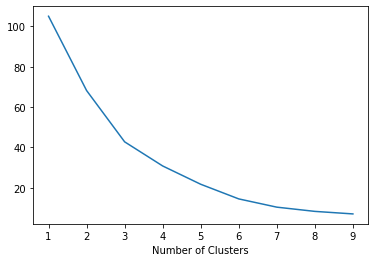

In [87]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

inertia_values=[]
for n in range(1,10):
    km=KMeans(init='k-means++',n_clusters=n,n_init=12)
    km.fit(X)
    inertia_values.append(km.inertia_)
    
plt.plot(range(1,10),inertia_values)
plt.xlabel('Number of Clusters')
plt.show()

#### Elbow point is k=3; let's set k=3 for k-means.

In [88]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 0 1 1]


In [89]:
df_city_cluster = df_city
df_city_cluster['City label'] = labels
df_city_cluster.head()

,City,Population,MHI,Median Housing Price,Latitude,Longitude,City label
0,Aliso Viejo,47037,99095,653900,33.576138,-117.725812,1
1,Anaheim,335057,59330,644100,33.834752,-117.911732,2
2,Anaheim Hills,55036,123260,816363,33.844408,-117.777386,1
3,Brea,38837,81278,755695,33.917044,-117.888856,1
4,Buena Park,80214,64809,632600,33.870413,-117.996217,1


#### Let's visualize the 3 clusters.

In [90]:
map_city = folium.Map(location=[latitude, longitude], zoom_start = 10)
# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0,1,clusterNum))
rainbow = [colors.rgb2hex(i) for i in colors_array] 

for lat, lon, city, cluster in zip(df_city_cluster['Latitude'], df_city_cluster['Longitude'], df_city_cluster['City'], df_city_cluster['City label']):
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = folium.Popup(str(city) + 'Cluster' + str(cluster), parse_html=True),
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_city)
map_city

#### Cluster 0: cites with highest median housing prices.

In [93]:
df_city_cluster.loc[df_city_cluster['City label']==0, df_city_cluster.columns[[-1]+list(range(0,4))]]

,City label,City,Population,MHI,Median Housing Price
13,0,Laguna Beach,22808,99190,2256500
22,0,Newport Beach,84417,108946,2337100
32,0,Villa Park,5825,151139,1337500


#### Cluster 1: cities with medium-range median housing prices and medium-range median household income.

In [94]:
df_city_cluster.loc[df_city_cluster['City label']==1, df_city_cluster.columns[[-1]+list(range(0,4))]]

,City label,City,Population,MHI,Median Housing Price
0,1,Aliso Viejo,47037,99095,653900
2,1,Anaheim Hills,55036,123260,816363
3,1,Brea,38837,81278,755695
4,1,Buena Park,80214,64809,632600
5,1,Costa Mesa,109796,65471,860400
6,1,Cypress,47610,82954,726500
7,1,Dana Point,33510,83306,1046400
8,1,Fountain Valley,55209,81661,861600
9,1,Fullerton,134079,69432,682700
10,1,Garden Grove,170148,60036,662600


#### Cluster 2: cities with a big population and lower median housing prices.

In [95]:
df_city_cluster.loc[df_city_cluster['City label']==2, df_city_cluster.columns[[-1]+list(range(0,4))]]

,City label,City,Population,MHI,Median Housing Price
1,2,Anaheim,335057,59330,644100
28,2,Santa Ana,325517,54399,593300


<a id="section3"></a>
## Part 3: Explore the venues, and cluster and visualize the cites

#### Define Foursquare credentials and versions

In [21]:
CLIENT_ID = 'GQC4I51F0WUQNJD2XEOJORGGWOU1BF3AN2GEPVCVEX5UVVNT' 
CLIENT_SECRET = 'BBC5Z4MXEVK15AMY53DZ323YCW2PHMPTDLS0KHYWNC2XFBR3' 
VERSION = '20180604'
LIMIT = 200
radius = 3000

#### Let's explore the venues in different cities in Orange County, by creating a function to repeat the same process.

In [22]:
def getNearbyVenues(city, latitude, longitude, radius=2500):
    venues_list = []
    for city, lat, lng in zip(city, latitude, longitude):
        print(city)
        # create API requests url
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        results = requests.get(url).json()['response']['groups'][0]['items']
        # return relavent information to the list
        for v in results:
            venues_list.append([(
                city,
                lat,
                lng,
                v['venue']['name'],
                v['venue']['location']['lat'],
                v['venue']['location']['lng'],
                v['venue']['categories'][0]['name'])])
    df_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    df_venues.columns = ['City', 'City Latitude', 'City Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Category'] 
    return(df_venues)

#### **Run the above function on each borough and create a new dataframe called oc_venues**

In [24]:
oc_venues = getNearbyVenues(city = df_city['City'], latitude = df_city['Latitude'], longitude = df_city['Longitude'])

Aliso Viejo
Anaheim
Anaheim Hills
Brea
Buena Park
Costa Mesa
Cypress
Dana Point
Fountain Valley
Fullerton
Garden Grove
Huntington Beach
Irvine
Laguna Beach
Laguna Hills
Laguna Niguel
Laguna Woods
La Habra
Lake Forest
La Palma
Los Alamitos
Mission Viejo
Newport Beach
Orange
Placentia
Rancho Santa Margarita
San Clemente
San Juan Capistrano
Santa Ana
Seal Beach
Stanton
Tustin
Villa Park
Westminster
Yorba Linda


In [25]:
oc_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Category
0,Aliso Viejo,33.576138,-117.725812,Trader Joe's,33.577510,-117.724516,Grocery Store
1,Aliso Viejo,33.576138,-117.725812,Wahoo's Fish Taco,33.575093,-117.725684,Taco Place
2,Aliso Viejo,33.576138,-117.725812,Nekter Juice Bar,33.575438,-117.726253,Juice Bar
3,Aliso Viejo,33.576138,-117.725812,Kanpai Sushi,33.575449,-117.724856,Sushi Restaurant
4,Aliso Viejo,33.576138,-117.725812,Opah Restaurant,33.575239,-117.725065,Seafood Restaurant


In [26]:
oc_venues.shape

(3365, 7)

#### Let's found out how many unique categories are returned from all cities.

In [27]:
oc_venues['Category'].unique()

array(['Grocery Store', 'Taco Place', 'Juice Bar', 'Sushi Restaurant',
       'Seafood Restaurant', 'Café', 'Burger Joint', 'Movie Theater',
       'South American Restaurant', 'Park', 'Bakery',
       'Fried Chicken Joint', 'Gym / Fitness Center', 'Shopping Plaza',
       'Mexican Restaurant', 'Fish & Chips Shop', 'Dessert Shop',
       'Smoke Shop', 'Bagel Shop', 'Hotel', 'Yoga Studio',
       'Thai Restaurant', 'Pizza Place', 'Sandwich Place',
       'Gymnastics Gym', 'Furniture / Home Store', 'Brewery',
       'Candy Store', 'Mediterranean Restaurant', 'Spa', 'Gym',
       'Middle Eastern Restaurant', 'Department Store', 'Wine Bar',
       'Tex-Mex Restaurant', 'American Restaurant', 'Food Court',
       'Salon / Barbershop', 'Cosmetics Shop', 'Baseball Field',
       'Asian Restaurant', 'Italian Restaurant', 'Playground',
       'Vegetarian / Vegan Restaurant', 'Fast Food Restaurant', 'Bank',
       'Health & Beauty Service', 'Coffee Shop', 'Chinese Restaurant',
       'Breakfast 

In [28]:
print('There are {} unique venue categories.'.format(len(oc_venues['Category'].unique())))

There are 263 unique venue categories.


#### Analyze each neighborhood and one-hot encode venue categories

In [29]:
# convert categorical variables into dummy variables
oc_onehot = pd.get_dummies(oc_venues['Category'],prefix="", prefix_sep="")
oc_onehot.head()

,ATM,Accessories Store,Airport,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Garden,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Noodle House,North Indian Restaurant,Optical Shop,Organic Grocery,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Resort,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Swim School,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
# add 'City' column to the oc_onehot dataframe
oc_onehot['City'] = oc_venues['City']
# move 'City' column to the first column
fixed_columns = [oc_onehot.columns[-1]]+list(oc_onehot.columns[:-1])
oc_onehot = oc_onehot[fixed_columns]
print(oc_onehot.shape)

(3365, 264)


In [31]:
oc_grouped = oc_onehot.groupby('City').mean().reset_index()
oc_grouped.head(10)

,City,ATM,Accessories Store,Airport,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Garden,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Noodle House,North Indian Restaurant,Optical Shop,Organic Grocery,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Resort,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Swim School,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Aliso Viejo,0.00,0.0,0.00,0.040000,0.0,0.0,0.00,0.0,0.01,0.020000,0.0,0.0,0.0,0.00,0.010000,0.05,0.01,0.00,0.01,0.0,0.00,0.0,0.010000,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.03,0.01,0.00,0.00,0.020000,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.01,0.0,0.0,0.000000,0.020000,0.00,0.00,0.

#### Let's create the new dataframe and display the top 10 venues for each neighborhood.

#### First, let's write a function to sort the venues in descending order.

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories=row.iloc[1:]
    row_categories_sorted=row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues=10
indicators=['st','nd','rd'] # surfix for 1st, 2nd and 3rd
# create columns according to number of top venues
columns=['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
oc_venues_sorted=pd.DataFrame(columns=columns)
oc_venues_sorted['City'] = oc_grouped['City']

for ind in np.arange(oc_grouped.shape[0]): 
    oc_venues_sorted.iloc[ind,1: ]=return_most_common_venues(oc_grouped.iloc[ind,:], num_top_venues)
    
oc_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aliso Viejo,Grocery Store,Bakery,Pizza Place,American Restaurant,Juice Bar,Park,Mexican Restaurant,Sushi Restaurant,Breakfast Spot,Gymnastics Gym
1,Anaheim,Mexican Restaurant,Theme Park Ride / Attraction,Brewery,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Taco Place,Burger Joint,Indian Restaurant
2,Anaheim Hills,Sandwich Place,Pizza Place,Trail,Fast Food Restaurant,Playground,Mexican Restaurant,Juice Bar,Burger Joint,Seafood Restaurant,Asian Restaurant
3,Brea,American Restaurant,Bakery,Pizza Place,Mexican Restaurant,Grocery Store,Burger Joint,Steakhouse,Juice Bar,Sandwich Place,BBQ Joint
4,Buena Park,Korean Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Pizza Place,Steakhouse,American Restaurant,Sandwich Place,Vietnamese Restaurant,Sushi Restaurant


### Cluster the cities

In [34]:
oc_venues_clustering = oc_grouped.drop('City',1)

In [35]:
oc_venues_clustering.shape

(35, 263)

#### Let's find the optimal value for k from 1-10 for k-means.

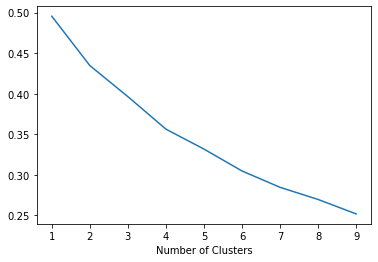

In [36]:
inertia_values1=[]
for n in range(1,10):
    km1=KMeans(init='k-means++',n_clusters=n,n_init=12)
    km1.fit(oc_venues_clustering)
    inertia_values1.append(km1.inertia_)
    
plt.plot(range(1,10),inertia_values1)
plt.xlabel('Number of Clusters')
plt.show()

In [37]:
# the elbow point is k=4; set number of clusters to 4
kclusters = 5
kmeans=KMeans(n_clusters=kclusters,random_state=0).fit(oc_venues_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 0, 1, 3, 4, 3, 3, 2, 3, 3, 4, 3, 3, 0, 1, 2, 0, 1, 3, 1, 3, 1,
       2, 0, 0, 3, 2, 0, 0, 2, 1, 3, 3, 4, 1], dtype=int32)

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [38]:
# add clustering labels
oc_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
oc_venues_sorted.head()

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Aliso Viejo,Grocery Store,Bakery,Pizza Place,American Restaurant,Juice Bar,Park,Mexican Restaurant,Sushi Restaurant,Breakfast Spot,Gymnastics Gym
1,0,Anaheim,Mexican Restaurant,Theme Park Ride / Attraction,Brewery,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Taco Place,Burger Joint,Indian Restaurant
2,1,Anaheim Hills,Sandwich Place,Pizza Place,Trail,Fast Food Restaurant,Playground,Mexican Restaurant,Juice Bar,Burger Joint,Seafood Restaurant,Asian Restaurant
3,3,Brea,American Restaurant,Bakery,Pizza Place,Mexican Restaurant,Grocery Store,Burger Joint,Steakhouse,Juice Bar,Sandwich Place,BBQ Joint
4,4,Buena Park,Korean Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Pizza Place,Steakhouse,American Restaurant,Sandwich Place,Vietnamese Restaurant,Sushi Restaurant


In [98]:
# create a new dataframe to store merged information from different dataframes
oc_merged = df_city

In [99]:
oc_merged = oc_merged.join(oc_venues_sorted.set_index('City'), on = 'City')
oc_merged.head()

,City,Population,MHI,Median Housing Price,Latitude,Longitude,City label,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aliso Viejo,47037,99095,653900,33.576138,-117.725812,1,3,Grocery Store,Bakery,Pizza Place,American Restaurant,Juice Bar,Park,Mexican Restaurant,Sushi Restaurant,Breakfast Spot,Gymnastics Gym
1,Anaheim,335057,59330,644100,33.834752,-117.911732,2,0,Mexican Restaurant,Theme Park Ride / Attraction,Brewery,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Taco Place,Burger Joint,Indian Restaurant
2,Anaheim Hills,55036,123260,816363,33.844408,-117.777386,1,1,Sandwich Place,Pizza Place,Trail,Fast Food Restaurant,Playground,Mexican Restaurant,Juice Bar,Burger Joint,Seafood Restaurant,Asian Restaurant
3,Brea,38837,81278,755695,33.917044,-117.888856,1,3,American Restaurant,Bakery,Pizza Place,Mexican Restaurant,Grocery Store,Burger Joint,Steakhouse,Juice Bar,Sandwich Place,BBQ Joint
4,Buena Park,80214,64809,632600,33.870413,-117.996217,1,4,Korean Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Pizza Place,Steakhouse,American Restaurant,Sandwich Place,Vietnamese Restaurant,Sushi Restaurant


#### Let's visualize the 4 clusters.

In [41]:
# set color scheme for the clusters
map_clusters=folium.Map(location=[latitude,longitude], zoom_start=10)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
for lat,lon,name,cluster in zip(oc_merged['Latitude'], oc_merged['Longitude'], oc_merged['City'], oc_merged['Cluster Labels']):
    folium.CircleMarker(
        [lat,lon],
        radius = 5,
        popup = folium.Popup(str(name)+'Cluster'+str(cluster),parse_html=True),
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#### Now we can examine each clusters and determine the discriminating venue categories that distinguish each cluster.

In [100]:
oc_merged.shape

(35, 18)

### Now we can examine each clusters and determine the discriminating venue categories that distinguish each cluster。

#### Cluster 0: these cities have a great varieties of food options (Mexican restaurant, coffee shop, pizza place, etc.).

In [101]:
oc_merged.loc[oc_merged['Cluster Labels']==0,oc_merged.columns[[0]+list(range(7,18))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Anaheim,0,Mexican Restaurant,Theme Park Ride / Attraction,Brewery,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Taco Place,Burger Joint,Indian Restaurant
14,Laguna Hills,0,Mexican Restaurant,Pizza Place,Coffee Shop,Bank,Donut Shop,Sushi Restaurant,Breakfast Spot,Fast Food Restaurant,Italian Restaurant,Bakery
17,La Habra,0,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Coffee Shop,Sandwich Place,Grocery Store,Convenience Store,Burger Joint,Donut Shop,Pharmacy
23,Orange,0,Mexican Restaurant,Coffee Shop,Convenience Store,Bar,American Restaurant,Restaurant,Sandwich Place,Café,Grocery Store,Video Game Store
24,Placentia,0,Mexican Restaurant,Brewery,Pizza Place,BBQ Joint,Fast Food Restaurant,Coffee Shop,Sandwich Place,Breakfast Spot,Supermarket,Ice Cream Shop
27,San Juan Capistrano,0,Mexican Restaurant,Coffee Shop,Farm,American Restaurant,Restaurant,Pizza Place,Breakfast Spot,Furniture / Home Store,Grocery Store,Wine Bar
28,Santa Ana,0,Mexican Restaurant,Coffee Shop,Convenience Store,Bar,Restaurant,American Restaurant,Café,Grocery Store,Video Game Store,Pharmacy


#### Cluster 1: these cities have mainly fast food options (sandwich places, fast food restaurant, pizza place, etc.), as well as some outdoor venues like parks and trails.

In [44]:
oc_merged.loc[oc_merged['Cluster Labels']==1,oc_merged.columns[[0]+list(range(7,18))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Anaheim Hills,1,Sandwich Place,Pizza Place,Trail,Fast Food Restaurant,Playground,Mexican Restaurant,Juice Bar,Burger Joint,Seafood Restaurant,Asian Restaurant
15,Laguna Niguel,1,Park,Grocery Store,Mexican Restaurant,Fast Food Restaurant,Pharmacy,Pizza Place,Sushi Restaurant,Italian Restaurant,Coffee Shop,Chinese Restaurant
18,Lake Forest,1,Sandwich Place,Pizza Place,Fast Food Restaurant,Park,Grocery Store,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Convenience Store,Chinese Restaurant
19,La Palma,1,Sandwich Place,Fast Food Restaurant,Mexican Restaurant,Coffee Shop,Korean Restaurant,Pizza Place,Shipping Store,Bank,Pharmacy,Grocery Store
21,Mission Viejo,1,Pizza Place,Coffee Shop,Sandwich Place,Mexican Restaurant,Donut Shop,Convenience Store,Italian Restaurant,Ice Cream Shop,Fast Food Restaurant,Bank
30,Stanton,1,Fast Food Restaurant,Convenience Store,Sandwich Place,Coffee Shop,Japanese Restaurant,Pizza Place,Sushi Restaurant,Mexican Restaurant,Italian Restaurant,Grocery Store
34,Yorba Linda,1,Sandwich Place,Mexican Restaurant,Grocery Store,Fast Food Restaurant,Convenience Store,Pizza Place,Pharmacy,Breakfast Spot,Ice Cream Shop,Italian Restaurant


#### Cluster 2: these are obviously beach cities.

In [45]:
oc_merged.loc[oc_merged['Cluster Labels']==2,oc_merged.columns[[0]+list(range(7,18))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Dana Point,2,American Restaurant,Beach,Mexican Restaurant,Park,Bar,Coffee Shop,Hotel,Seafood Restaurant,Board Shop,Grocery Store
13,Laguna Beach,2,Beach,Seafood Restaurant,American Restaurant,Sushi Restaurant,New American Restaurant,Coffee Shop,Italian Restaurant,Mexican Restaurant,Art Gallery,Hotel
22,Newport Beach,2,Beach,Seafood Restaurant,Coffee Shop,Italian Restaurant,American Restaurant,Bar,Donut Shop,Taco Place,Restaurant,Ice Cream Shop
26,San Clemente,2,Mexican Restaurant,Clothing Store,Pizza Place,Beach,American Restaurant,Coffee Shop,Sandwich Place,Shoe Store,Chinese Restaurant,Burger Joint
29,Seal Beach,2,Mexican Restaurant,Coffee Shop,Beach,Sushi Restaurant,Seafood Restaurant,Grocery Store,American Restaurant,Breakfast Spot,Cosmetics Shop,BBQ Joint


#### Cluster 3: these cities have a variety of restaurant and fast food options, as well as other amenities such as grocery stores, gyms, etc.

In [46]:
oc_merged.loc[oc_merged['Cluster Labels']==3,oc_merged.columns[[0]+list(range(7,18))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aliso Viejo,3,Grocery Store,Bakery,Pizza Place,American Restaurant,Juice Bar,Park,Mexican Restaurant,Sushi Restaurant,Breakfast Spot,Gymnastics Gym
3,Brea,3,American Restaurant,Bakery,Pizza Place,Mexican Restaurant,Grocery Store,Burger Joint,Steakhouse,Juice Bar,Sandwich Place,BBQ Joint
5,Costa Mesa,3,Coffee Shop,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Pizza Place,Grocery Store,Mexican Restaurant,Concert Hall,Dessert Shop,Shopping Mall
6,Cypress,3,Sandwich Place,American Restaurant,Fast Food Restaurant,Japanese Restaurant,Mexican Restaurant,Coffee Shop,Ice Cream Shop,Grocery Store,Italian Restaurant,Pharmacy
8,Fountain Valley,3,Gym / Fitness Center,American Restaurant,Pizza Place,Grocery Store,Seafood Restaurant,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Bakery
9,Fullerton,3,Coffee Shop,Sushi Restaurant,Burger Joint,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Mexican Restaurant,Italian Restaurant,Comic Shop,Trail
11,Huntington Beach,3,Mexican Restaurant,Coffee Shop,Grocery Store,Sandwich Place,Pizza Place,Japanese Restaurant,Italian Restaurant,Gym / Fitness Center,American Restaurant,Seafood Restaurant
12,Irvine,3,Sandwich Place,Shopping Mall,Coffee Shop,Japanese Restaurant,Café,Burger Joint,Juice Bar,Ice Cream Shop,Fast Food Restaurant,Mexican Restaurant
16,Laguna Woods,3,Coffee Shop,Sandwich Place,Mexican Restaurant,Grocery Store,American Restaurant,Italian Restaurant,Fast Food Restaurant,Seafood Restaurant,Breakfast Spot,Shipping Store
20,Los Alamitos,3,American Restaurant,Park,Fast Food Restaurant,Mexican Restaurant,Japanese Restaurant,Coffee Shop,Convenience Store,Pizza Place,Sandwich Place,Chinese Restaurant


#### Cluster 4: these cities have predominatly Vietnamese and Korean restaurants.

In [47]:
oc_merged.loc[oc_merged['Cluster Labels']==4,oc_merged.columns[[0]+list(range(7,18))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Buena Park,4,Korean Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Pizza Place,Steakhouse,American Restaurant,Sandwich Place,Vietnamese Restaurant,Sushi Restaurant
10,Garden Grove,4,Vietnamese Restaurant,Mexican Restaurant,Coffee Shop,Bar,Ice Cream Shop,Bakery,Korean Restaurant,Bubble Tea Shop,Seafood Restaurant,Thai Restaurant
33,Westminster,4,Vietnamese Restaurant,Chinese Restaurant,Korean Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Seafood Restaurant,Discount Store,Bank,Asian Restaurant
